In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
from sklearn.metrics import silhouette_score, silhouette_samples
%matplotlib inline

In [ ]:
df = pd.read_csv('dataset.csv')
print('Shape:', df.shape)
df.head()

Shape: (114000, 21)


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
# Remove useless features
new_df = df.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'])

In [ ]:
# One-hot encode genres
new_df = pd.get_dummies(new_df, prefix='', prefix_sep='', columns=['track_genre'])
new_df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,spanish,study,swedish,synth-pop,tango,techno,trance,trip-hop,turkish,world-music
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,...,False,False,False,False,False,False,False,False,False,False
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,...,False,False,False,False,False,False,False,False,False,False
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,...,False,False,False,False,False,False,False,False,False,False
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,...,False,False,False,False,False,False,False,False,False,False
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
new_df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [ ]:
numeric_columns = new_df.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [ ]:
scaler = StandardScaler()
scaled_values = scaler.fit_transform(new_df[numeric_columns])

scaled_values = pd.DataFrame(scaled_values, columns=numeric_columns)

new_df = new_df.drop(columns=numeric_columns)
new_df = pd.concat([scaled_values, new_df], axis=1)
new_df.head()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,spanish,study,swedish,synth-pop,tango,techno,trance,trip-hop,turkish,world-music
0,1.782627,0.024575,0.629244,-0.717148,-1.210442,0.300828,-1.326281,0.551848,-0.850202,-0.504109,...,False,False,False,False,False,False,False,False,False,False
1,0.975633,-0.730859,-0.845908,-1.889980,-1.210442,-1.784744,0.753988,-0.078993,1.831732,-0.504094,...,False,False,False,False,False,False,False,False,False,False
2,1.065299,-0.160332,-0.742186,-1.122669,-1.491343,-0.293288,0.753988,-0.273826,-0.315499,-0.504112,...,False,False,False,False,False,False,False,False,False,False
3,1.692961,-0.243214,-1.733304,-2.312994,-1.491343,-2.039252,0.753988,-0.457309,1.774593,-0.503883,...,False,False,False,False,False,False,False,False,False,False
4,2.186125,-0.271919,0.295030,-0.788711,-0.929541,-0.282750,0.753988,-0.303145,0.463399,-0.504112,...,False,False,False,False,False,False,False,False,False,False


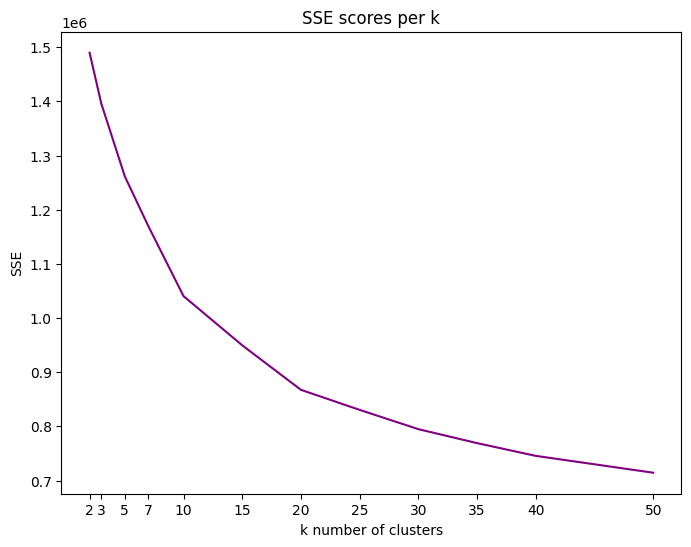

In [ ]:
# K-means Model
k_values = [2, 3, 5, 7, 10, 15, 20, 25, 30, 35, 40, 50]
sse_values = []


for k in k_values:
  k_means = KMeans(n_clusters=k)
  k_means.fit(new_df)

  sse_values.append(k_means.inertia_)

plt.figure(figsize=(8,6))
plt.plot(k_values, sse_values, color='purple')
plt.title('SSE scores per k')
plt.xlabel('k number of clusters')
plt.xticks(k_values)
plt.ylabel('SSE')
plt.show()

The sharp decrease in SSE (Sum of Squared Errors) appears to occur at **10 clusters**.

In [ ]:
# K-means with 10 clusters
k_means = KMeans(n_clusters=10, random_state=42)
k_means.fit(new_df)

labels = k_means.labels_
print(labels)
print('Shape:', labels.shape)
print('Labels:', np.unique(labels))

df['Cluster'] = labels
new_df['Cluster'] = labels

[3 6 2 ... 6 2 6]
Shape: (114000,)
Labels: [0 1 2 3 4 5 6 7 8 9]


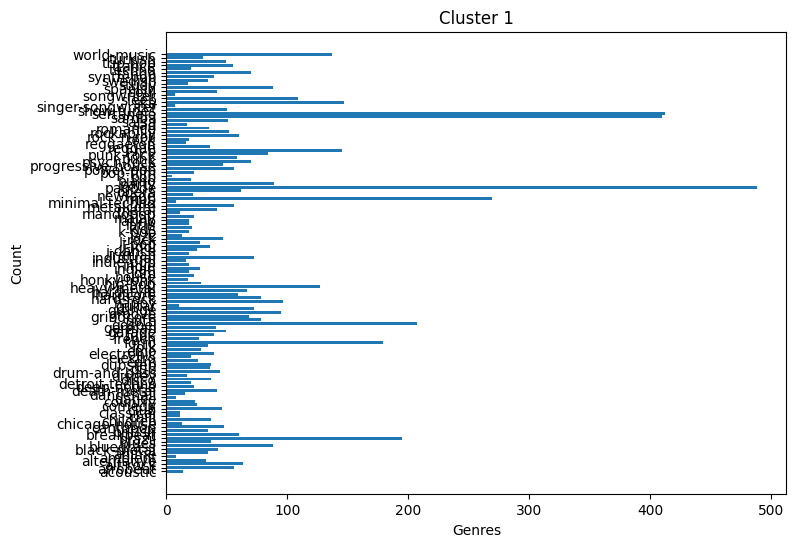

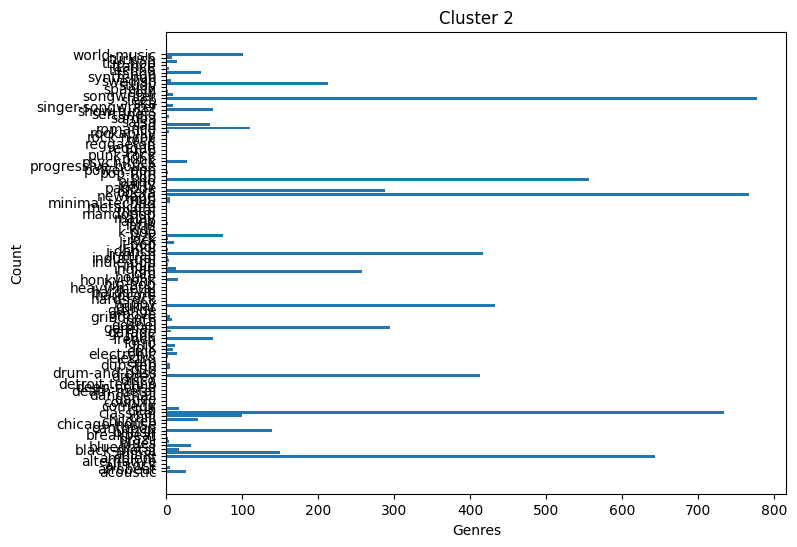

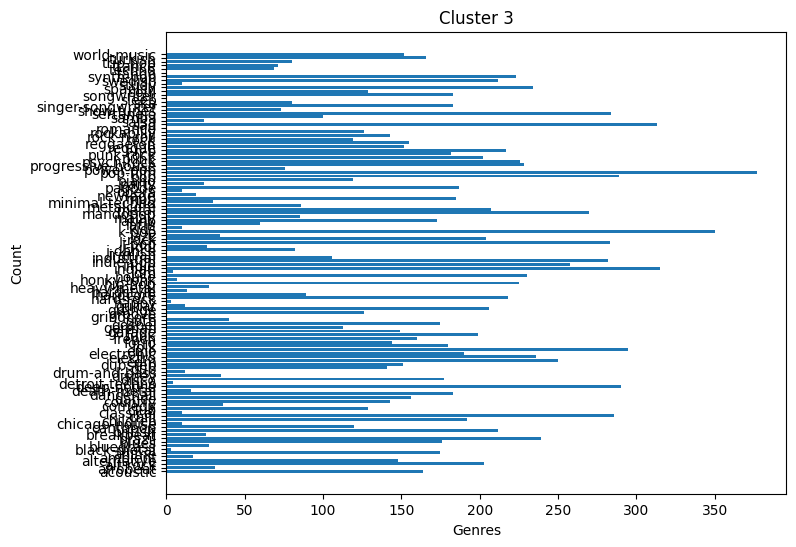

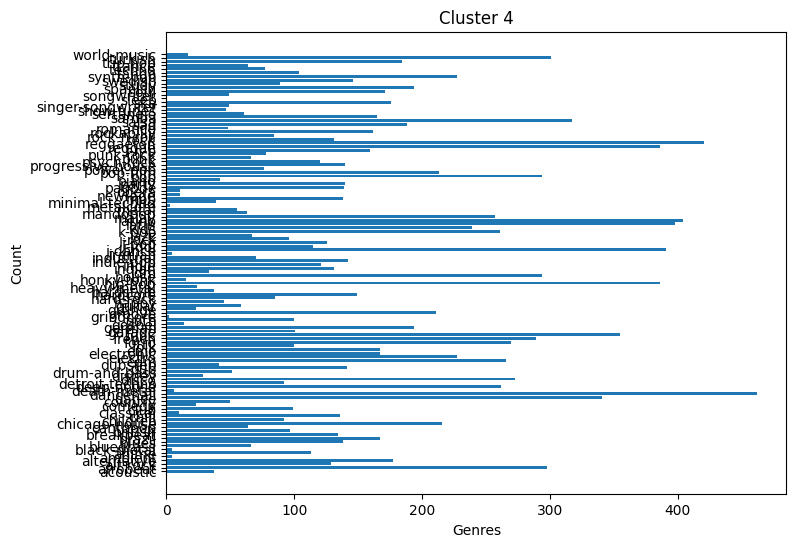

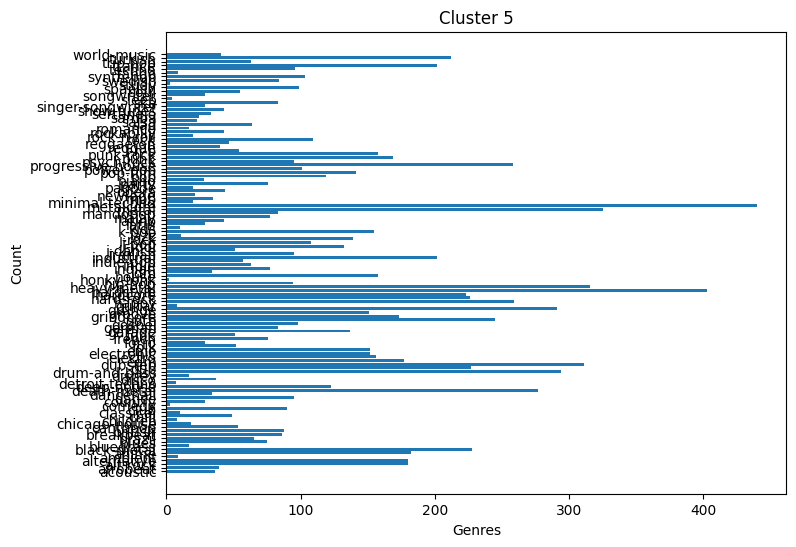

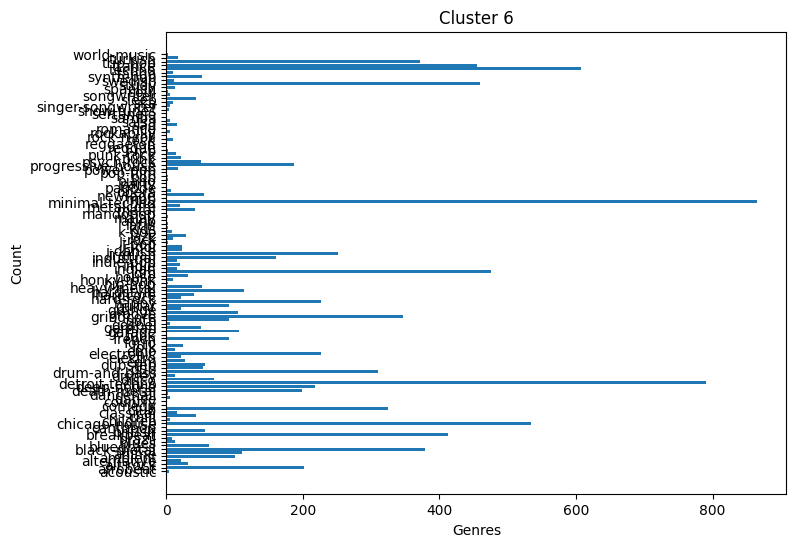

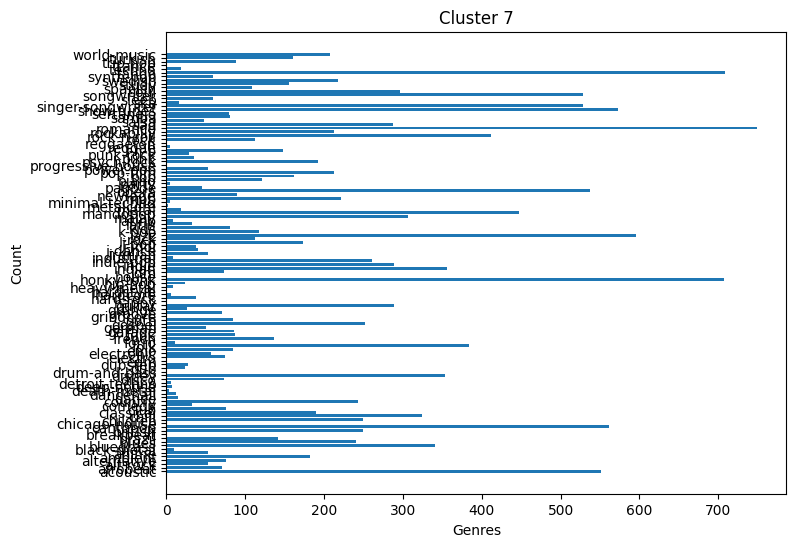

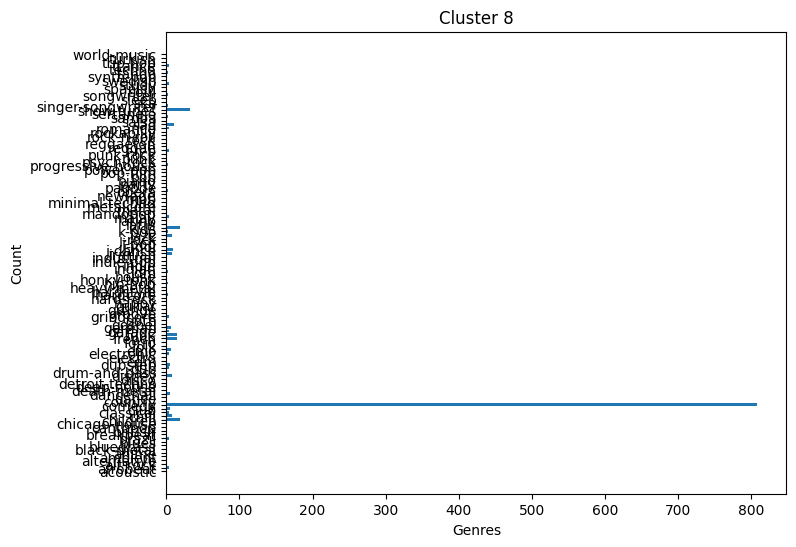

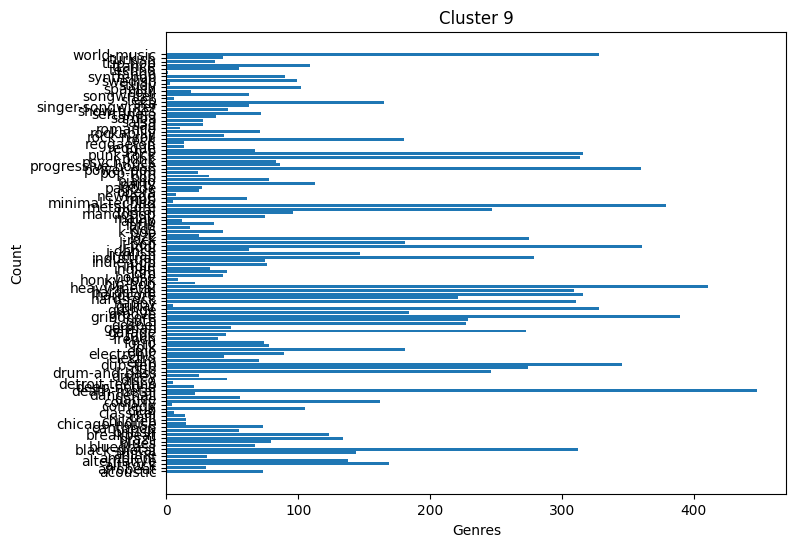

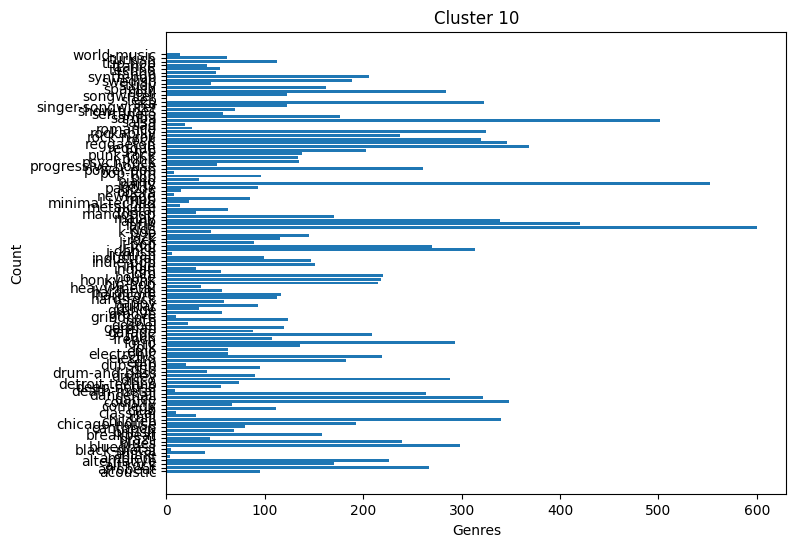

In [ ]:
genre_columns = new_df.drop(columns=numeric_columns + ['explicit', 'Cluster']).columns

genre_distribution = []
dominant_genres = {}

for cluster in range(len(np.unique(labels))):
  cluster_points = new_df[new_df['Cluster'] == cluster]

  for genre in genre_columns:
    genre_distribution.append(cluster_points[genre].sum())

  dominant_genres[cluster+1] = genre_columns[np.argmax(genre_distribution)]

  plt.figure(figsize=(8,6))
  plt.barh(genre_columns, genre_distribution)
  plt.title(f'Cluster {cluster+1}')
  plt.xlabel('Genres')
  plt.ylabel('Count')
  plt.show()

  genre_distribution = []

In [ ]:
dominant_genres

{1: 'pagode',
 2: 'sleep',
 3: 'pop-film',
 4: 'dancehall',
 5: 'metalcore',
 6: 'minimal-techno',
 7: 'romance',
 8: 'comedy',
 9: 'death-metal',
 10: 'kids'}

A track I enjoy is 'Without Me' by Eminem.

In [ ]:
df[(df['artists'] == 'Eminem') & (df['track_name'] == 'Without Me')]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,Cluster
51159,51159,7lQ8MOhq6IN2w8EYcFNSUk,Eminem,The Eminem Show,Without Me,88,290320,True,0.908,0.669,...,1,0.0738,0.00286,0.0,0.237,0.662,112.238,4,hip-hop,2


In [ ]:
new_df.iloc[51159]

,51159
popularity,2.455123
duration_ms,0.580545
danceability,1.966101
energy,0.109798
key,0.474964
...,...
trance,False
trip-hop,False
turkish,False
world-music,False


In [ ]:
new_df.iloc[51159].values.reshape(1, -1).shape

(1, 130)

In [ ]:
# Calculate euclidean distances within the cluster
songs_list = df[df['Cluster'] == 2]
cluster_points = new_df[new_df['Cluster'] == 2]
target_point = new_df.iloc[51159].values.reshape(1, -1)
distances = euclidean_distances(target_point, cluster_points)

print('Value in-cluster indeces:', np.argsort(distances))
print('Distance values:', np.sort(distances))

Value in-cluster indeces: [[6397 6471 6395 ... 4596 1735 4972]]
Distance values: [[0.         1.38610619 1.70083549 ... 7.74992405 7.93234639 8.43631358]]


The first sample has a distance of zero because it is the target point itself, as shown:

In [ ]:
songs_list.iloc[6397][['artists', 'track_name']]

,51159
artists,Eminem
track_name,Without Me


The 3 closest song are:

In [ ]:
closest_points = np.argsort(distances)[0, 1:4]
print('In-cluster indeces:', closest_points, '\n')
songs_list.iloc[closest_points][['artists', 'track_name', 'album_name', 'track_genre']]

In-cluster indeces: [6471 6395 6436] 



,artists,track_name,album_name,track_genre
51504,Travis Scott,goosebumps,Birds In The Trap Sing McKnight,hip-hop
51150,French Montana;Swae Lee,Unforgettable,Jungle Rules,hip-hop
51350,Kendrick Lamar;SZA,All The Stars (with SZA),Black Panther The Album Music From And Inspire...,hip-hop


We observe that the songs recommended by the model are generally similar to *Without Me*. They all belong to the **hip-hop genre** and are tracks by well-known artists in the field, such as **Travis Scott** and **Kendrick Lamar**, whom I personally listen to. However, while these songs fall under the same genre, they do not share the same tempo, and I personally would not consider them very similar.

In [ ]:
# Calculate cosine similarities within the cluster
songs_list = df[df['Cluster'] == 2]
cluster_points = new_df[new_df['Cluster'] == 2]
target_point = new_df.iloc[51159].values.reshape(1, -1)
distances = cosine_similarity(target_point, cluster_points)

print('Value in-cluster indeces:', np.flip(np.argsort(distances)))
print('Distance values:', np.flip(np.sort(distances)))

Value in-cluster indeces: [[6397 6471 6395 ... 5632 9288  189]]
Distance values: [[1.         0.9517097  0.92558624 ... 0.08383674 0.06208223 0.05022706]]


In [ ]:
closest_points = np.flip(np.argsort(distances))[0, 1:4]
print('In-cluster indeces:', closest_points, '\n')
songs_list.iloc[closest_points][['artists', 'track_name', 'album_name', 'track_genre']]

In-cluster indeces: [6471 6395 6436] 



,artists,track_name,album_name,track_genre
51504,Travis Scott,goosebumps,Birds In The Trap Sing McKnight,hip-hop
51150,French Montana;Swae Lee,Unforgettable,Jungle Rules,hip-hop
51350,Kendrick Lamar;SZA,All The Stars (with SZA),Black Panther The Album Music From And Inspire...,hip-hop


We obtain the same results using the **cosine similarity metric** as well.

In [ ]:
# Clear the the previous labels
df = df.drop(columns='Cluster')
new_df = new_df.drop(columns='Cluster')

For k_clusters = 2 The average silhouetter score is: 0.1856515600663944
For k_clusters = 3 The average silhouetter score is: 0.09764650066369165
For k_clusters = 5 The average silhouetter score is: 0.0853582369299318
For k_clusters = 7 The average silhouetter score is: 0.08925556298950056
For k_clusters = 10 The average silhouetter score is: 0.08561030222723211
For k_clusters = 15 The average silhouetter score is: 0.08937023838997203
For k_clusters = 20 The average silhouetter score is: 0.08892572327455223


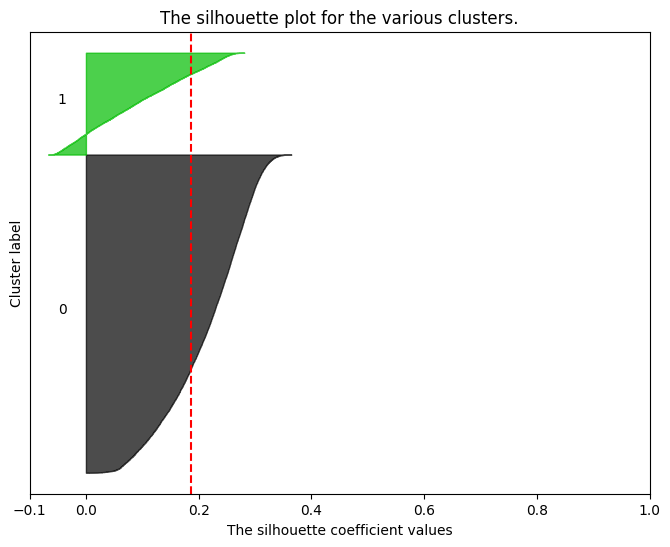

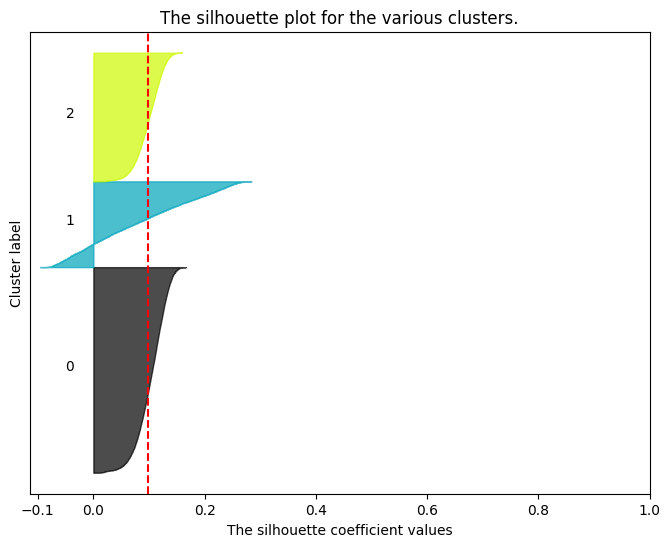

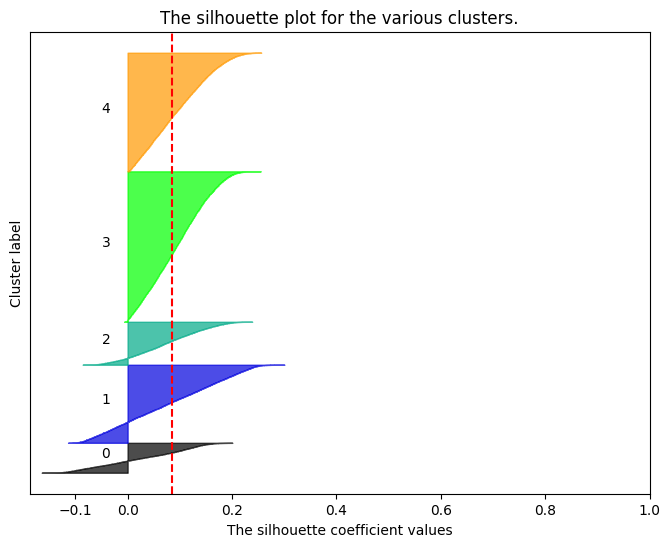

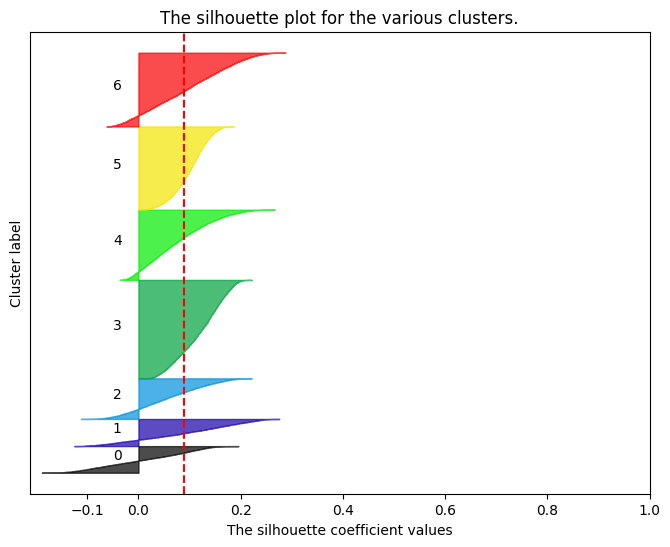

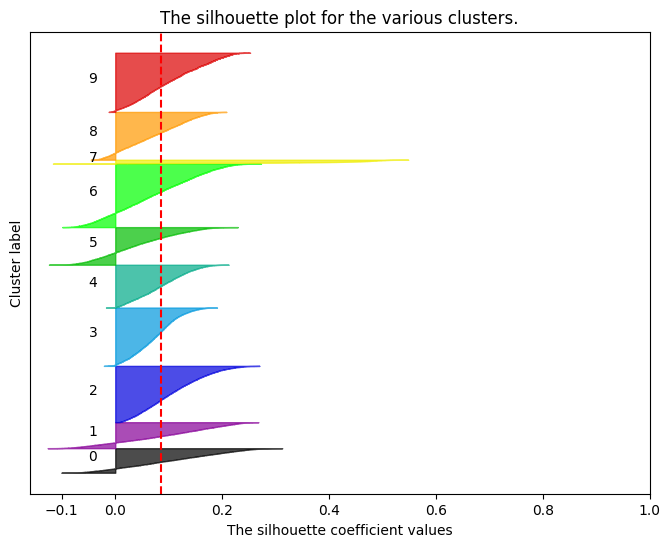

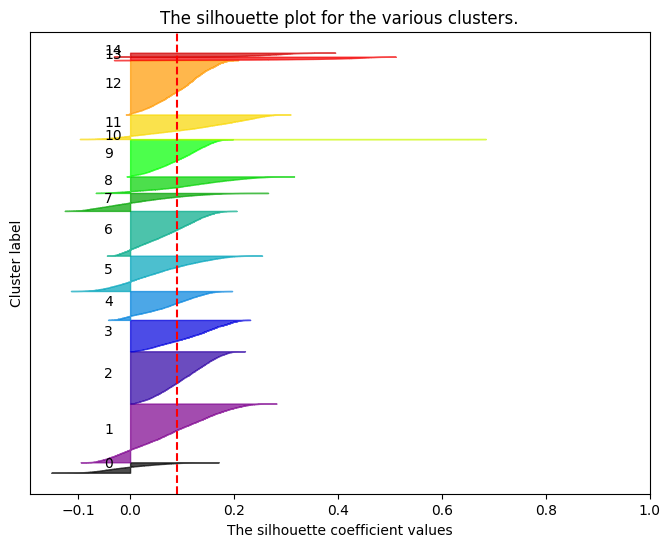

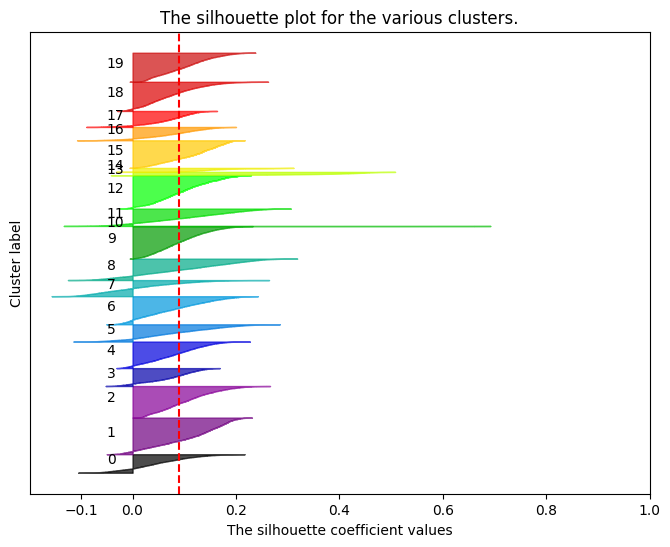

In [ ]:
# Cluster Evaluation with Silhouette  Scoring
k_values = [2, 3, 5, 7, 10, 15, 20]


for k in k_values:
  fig, ax = plt.subplots(1, 1, figsize=(8,6))

  k_means = KMeans(n_clusters=k, random_state=42)
  labels = k_means.fit_predict(new_df)

  silhouette_avg = silhouette_score(new_df, labels)
  print(
      'For k_clusters =',
      k,
      "The average silhouetter score is:",
      silhouette_avg
  )

  sample_silhouette_values = silhouette_samples(new_df, labels)

  y_lower = 10
  for i in range(k):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = sample_silhouette_values[labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      ax.fill_betweenx(
          np.arange(y_lower, y_upper),
          0,
          ith_cluster_silhouette_values,
          facecolor=color,
          edgecolor=color,
          alpha=0.7,
      )

      # Label the silhouette plots with their cluster numbers at the middle
      ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax.set_title("The silhouette plot for the various clusters.")
  ax.set_xlabel("The silhouette coefficient values")
  ax.set_ylabel("Cluster label")

  # The vertical line for average silhouette score of all the values
  ax.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax.set_yticks([])  # Clear the yaxis labels / ticks
  ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

We are searching for a number of clusters where all clusters lie **above the average**. Additionally, we want the **thickness (size) of the clusters** to be within reasonable bounds, avoiding scenarios where some clusters are very small while others are very large in the same plot.

Both **k=7** and **k=10** appear to be good choices.

In [ ]:
# Cluster Evaluation with Silhouette  Scoring
eps_values = [0.1, 0.3, 0.5, 1, 3, 10, 15]


for k in eps_values:
  fig, ax = plt.subplots(1, 1, figsize=(8,6))

  dbscan = DBSCAN(eps=k)
  labels = dbscan.fit_predict(new_df)

  silhouette_avg = silhouette_score(new_df, labels)
  print(
      'For k_clusters =',
      k,
      "The average silhouetter score is:",
      silhouette_avg
  )

For k_clusters = 0.1 The average silhouetter score is: -0.35011994627875725
For k_clusters = 0.3 The average silhouetter score is: -0.3495584866540075
For k_clusters = 0.5 The average silhouetter score is: -0.35183763355142067
For k_clusters = 1 The average silhouetter score is: -0.41376881896276546
For k_clusters = 3 The average silhouetter score is: 0.3656217853024067
